In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [81]:
dataset.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   bool 
 1   Age                             2111 non-null   bool 
 2   Height                          2111 non-null   bool 
 3   Weight                          2111 non-null   bool 
 4   family_history_with_overweight  2111 non-null   bool 
 5   FAVC                            2111 non-null   bool 
 6   FCVC                            2111 non-null   bool 
 7   NCP                             2111 non-null   bool 
 8   CAEC                            2111 non-null   bool 
 9   SMOKE                           2111 non-null   bool 
 10  CH2O                            2111 non-null   bool 
 11  SCC                             2111 non-null   bool 
 12  FAF                             2111 non-null   bool 
 13  TUE

In [82]:
print("No. of rows : ", dataset.shape[0])
print("No. of columns : ", dataset.shape[1])
print("Independent variables : ", list(dataset.columns[:-1]))
print("Dependent Variable : ", dataset.columns[-1])

No. of rows :  2111
No. of columns :  17
Independent variables :  ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
Dependent Variable :  NObeyesdad


In [83]:
numerical_vals = [x for x in dataset.select_dtypes(include=np.number)]
categorical_vals = [x for x in dataset.select_dtypes(exclude=np.number)]

print("Number of Categorical Data Columns : ", len(categorical_vals))
print("Number of Numerical Data Columns : ", len(numerical_vals))
print("Numerical Columns : \n", numerical_vals)
print("Categorical Columns : \n", categorical_vals) 

Number of Categorical Data Columns :  9
Number of Numerical Data Columns :  8
Numerical Columns : 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns : 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


<AxesSubplot: xlabel='NObeyesdad'>

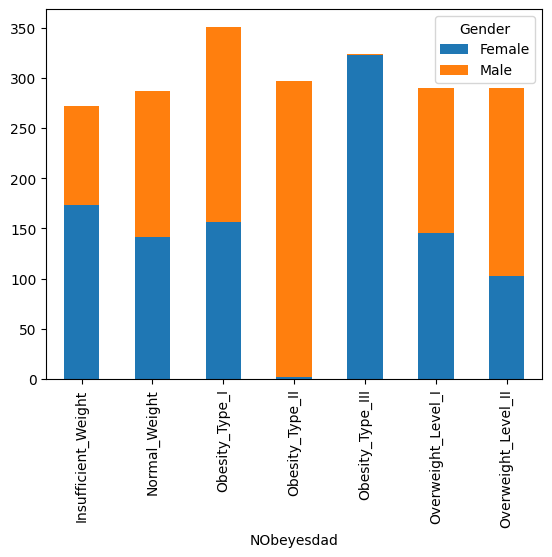

In [84]:
dataset.groupby('NObeyesdad')['Gender'].value_counts().unstack('Gender').plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='NObeyesdad'>

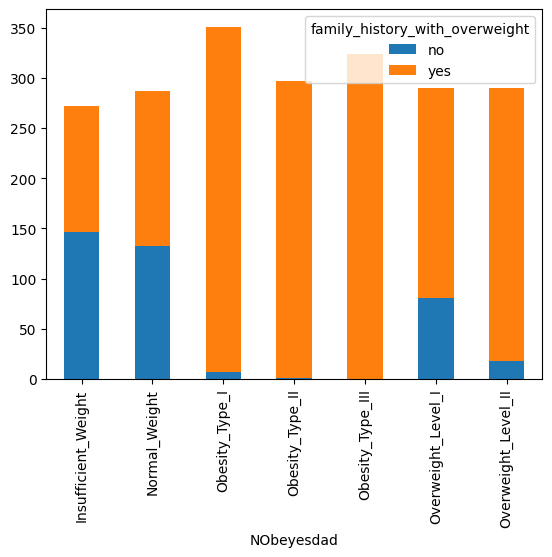

In [85]:
dataset.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack('family_history_with_overweight').plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='NObeyesdad'>

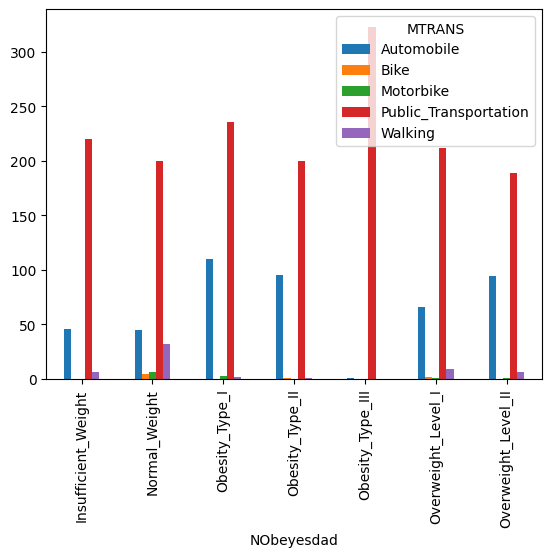

In [86]:
dataset.groupby('NObeyesdad')['MTRANS'].value_counts().unstack('MTRANS').plot(kind='bar')

<AxesSubplot: xlabel='NObeyesdad'>

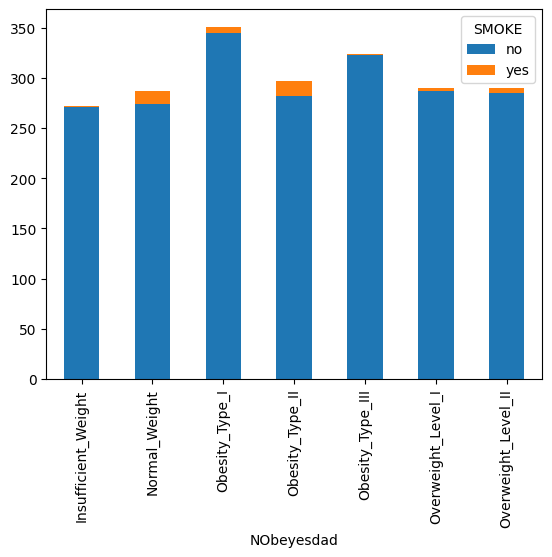

In [87]:
dataset.groupby('NObeyesdad')['SMOKE'].value_counts().unstack('SMOKE').plot(kind='bar', stacked=True)

In [88]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [89]:
X = dataset.drop('NObeyesdad', axis=1).copy()
y = dataset['NObeyesdad'].copy()


In [90]:
print(X)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [91]:
print("Unique Values in the categorical columns which need to be encoded : ")
for i in categorical_vals[:-1]: 
    print(i," : " ,pd.unique(X[i]))

Unique Values in the categorical columns which need to be encoded : 
Gender  :  ['Female' 'Male']
family_history_with_overweight  :  ['yes' 'no']
FAVC  :  ['no' 'yes']
CAEC  :  ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE  :  ['no' 'yes']
SCC  :  ['no' 'yes']
CALC  :  ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS  :  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [92]:
print(y)

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object


In [93]:
pd.unique(y)

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [95]:
for i in categorical_vals[:-1]: 
    X[i] = le.fit_transform(X[i])

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [97]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(X) 
scaled_features = scaler.transform(X) 
  
data_feat = pd.DataFrame(scaled_features, columns = dataset.columns[:-1]) 
data_feat.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feat,y,test_size = 0.2, random_state = 42)

In [99]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
162,-1.011914,-0.522124,-0.768388,-1.015318,0.472291,0.362349,1.088342,0.404153,-3.969213,6.853997,-0.013073,-0.218272,1.163820,-1.080625,-0.521160,0.503337
2001,-1.011914,-0.533953,0.545156,1.796170,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,1.435437,-0.218272,0.553418,0.200030,-0.521160,0.503337
1435,-1.011914,-0.222692,-0.428400,-0.152388,0.472291,0.362349,-2.276674,-1.710184,0.300346,-0.145900,1.236246,-0.218272,-1.037118,1.645266,-0.521160,0.503337
649,-1.011914,-0.390041,-1.218139,-1.617340,-2.117337,-2.759769,1.088342,-1.272151,-1.834434,-0.145900,0.884935,-0.218272,0.104145,-1.080625,1.419172,0.503337
1280,0.988227,0.265136,1.178403,0.743025,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,1.387317,-0.218272,0.944295,0.036711,-0.521160,0.503337


In [100]:
X_test.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
544,-1.011914,-0.615612,0.582108,-1.255930,0.472291,0.362349,-0.785019,1.550889,-1.834434,-0.1459,-0.235117,-0.218272,2.187029,2.204618,1.419172,0.503337
1987,-1.011914,0.265964,-0.822525,0.932553,0.472291,0.362349,1.088342,0.404153,0.300346,-0.1459,1.136250,-0.218272,-1.188039,-0.550607,-0.521160,0.503337
420,0.988227,-0.994977,1.590034,-1.015318,0.472291,0.362349,1.088342,1.689740,0.300346,-0.1459,-0.013073,4.581439,1.163820,-1.080625,-0.521160,-1.875493
527,-1.011914,-0.522124,-1.947599,-1.702735,-2.117337,0.362349,1.088342,-2.167023,-1.834434,-0.1459,-1.644905,-0.218272,-1.188039,-1.080625,-0.521160,0.503337
196,0.988227,-0.364507,0.518024,-0.480660,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.1459,-0.013073,-0.218272,-0.012109,2.204618,-0.521160,-1.082550


In [101]:
y_test

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6,
       1, 6, 5, 3, 0, 5, 2, 0, 5, 2, 1, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 5, 2, 5, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 1, 2, 0, 3, 0, 2, 1, 5, 6, 1, 6, 3, 4, 2, 6,
       2, 6, 2, 5, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 5, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 3,
       4, 6, 3, 5, 3, 6, 0, 4, 5, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 2, 2, 1, 2, 2, 0, 5, 2, 0, 1, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 2, 4, 6, 2, 3, 2, 3, 4, 3, 1, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 5, 3, 3, 6, 6, 1,

In [102]:
y_train

array([1, 4, 2, ..., 6, 2, 5])

In [103]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
y_pred

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 6, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 5, 0, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 2, 1, 5,
       1, 6, 5, 3, 0, 5, 2, 0, 5, 2, 5, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 5, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 5, 2, 5, 5, 0, 0, 0, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 0, 2, 0, 3, 0, 3, 5, 5, 6, 1, 6, 3, 4, 2, 6,
       2, 6, 2, 5, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 6, 3, 5, 3, 6, 0, 4, 1, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 2, 2, 1, 2, 2, 0, 5, 2, 0, 1, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 5, 3, 3, 6, 6, 1,

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56  0  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 75  2  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 52  2]
 [ 0  0  0  0  0  2 48]]


0.9550827423167849

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.96      0.85      0.91        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.94      0.96      0.95        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423



In [108]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.20 %
Standard Deviation: 1.34 %


In [109]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 94.20 %
Best Parameters: {'C': 1, 'kernel': 'linear'}
